# APS 1 — Análise Exploratória de Dados (EDA)

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# fetch dataset
adult = fetch_ucirepo(id=2)

In [3]:
# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# dataframe final para EDA
df = pd.concat([X, y], axis=1)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df["income"].value_counts()

income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Identificamos uma inconsistência na variável alvo: o target deveria ser binário (`<=50K` e `>50K`), mas aparecem quatro rótulos devido ao ponto final em parte dos registros. A seguir, faremos a padronização desses valores.

In [5]:
# tratando a coluna do target para remover inconsistência
df["income"] = df["income"].replace({"<=50K.": "<=50K", ">50K.": ">50K"})

df["income"].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

Ajuste concluído para a variável alvo. Durante a exploração das variáveis explicativas, serão aplicados novos tratamentos de qualidade de dados quando necessário.

## Visão geral da base
A base possui 14 variáveis preditoras (além do target) e aproximadamente 16 mil instâncias.

## Classificação das variáveis

### Variáveis quantitativas

#### Discretas
- **age**: idade
- **education-num**: anos de estudo
- **hours-per-week**: horas trabalhadas por semana

#### Contínuas
- **fnlwgt**: peso amostral
- **capital-gain**: ganho de capital
- **capital-loss**: perda de capital

### Variáveis qualitativas

#### Categóricas nominais
- **workclass**: tipo de vínculo de trabalho
- **marital-status**: estado civil
- **occupation**: ocupação
- **relationship**: relação familiar
- **race**: raça
- **sex**: sexo
- **native-country**: país de origem
- **income**: faixa de renda (target binário)

#### Categórica ordinal
- **education**: nível de escolaridade

## Preparação para análise exploratória
Nesta etapa, dividimos a base em treino e teste para realizar a EDA de forma consistente, evitando uso indevido de informações do conjunto de teste.

## Análise univariada

In [6]:
X = df.drop('income', axis=1).copy()
y = df['income'].copy() #target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
)

### Estatísticas e distribuições das variáveis
A seguir, analisamos medidas-resumo, histogramas e boxplots para entender tendência central, dispersão e possíveis outliers.

In [10]:
X_train.select_dtypes(include=['number']).agg([
    "mean",
    "median",
    "std",
    "min",
    "max",
    lambda x: x.quantile(0.75) - x.quantile(0.25)
])

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
mean,38.632662,1.900070e+05,10.077675,1091.418038,87.276610,40.400788
median,37.000000,1.782720e+05,10.000000,0.000000,0.000000,40.000000
std,13.737816,1.058195e+05,2.565268,7500.039346,402.816969,12.393669
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000
<lambda>,20.000000,1.205630e+05,3.000000,0.000000,0.000000,5.000000


In [9]:
y_train.value_counts()

income
<=50K    29741
>50K      9332
Name: count, dtype: int64

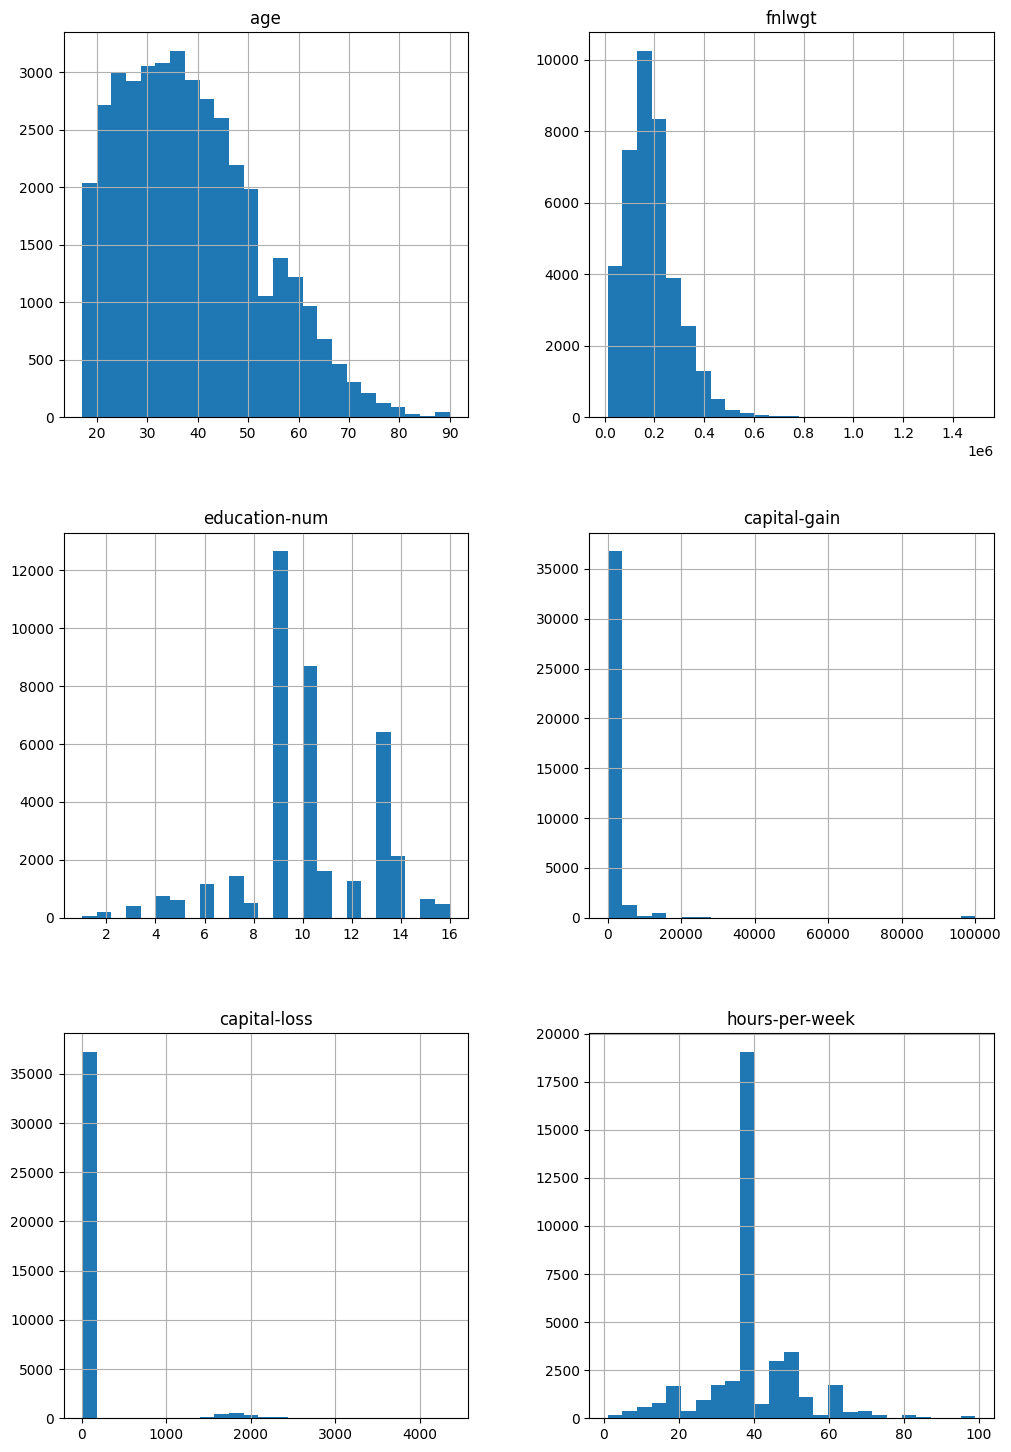

In [13]:
X_train.select_dtypes(include=['number']).hist(
    bins = 25,
    figsize = (12, 18)
)

plt.show()

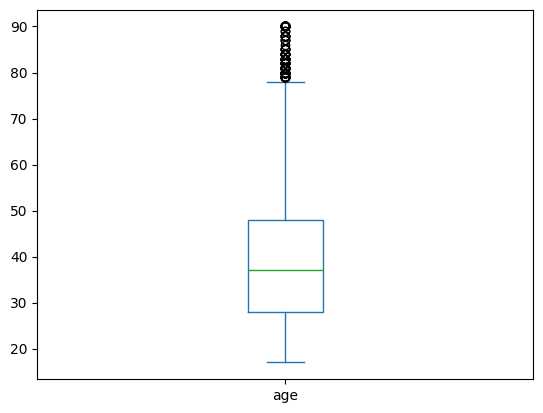

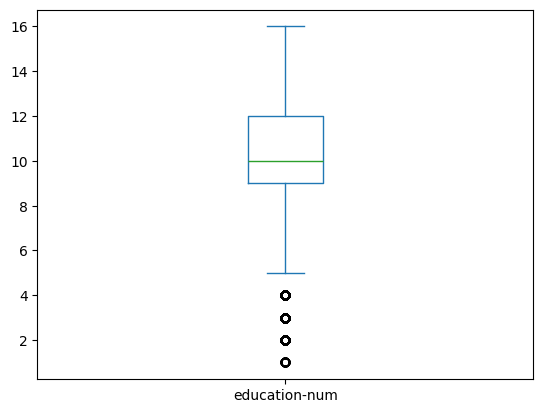

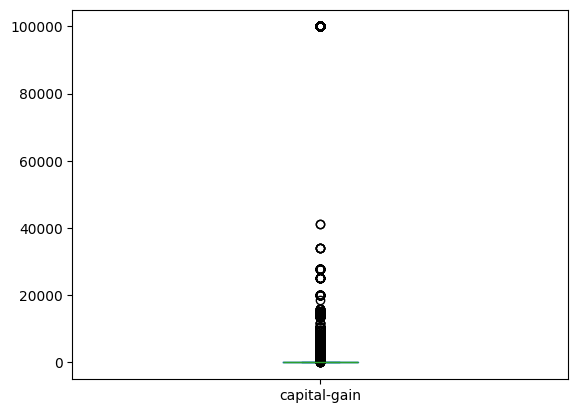

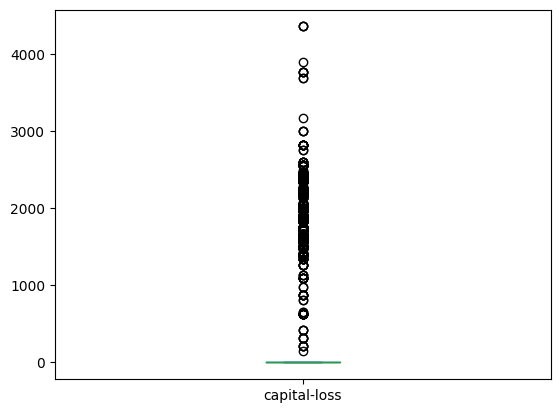

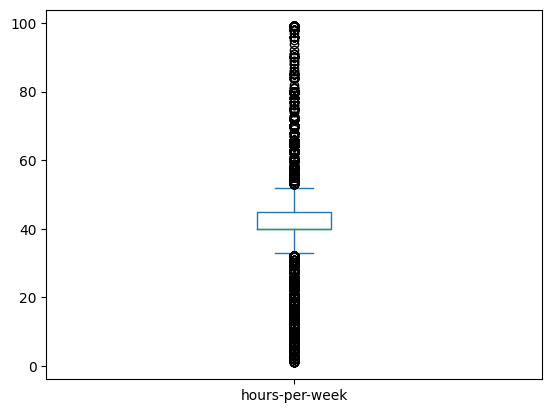

In [11]:
X_train["age"].plot.box()
plt.show()

X_train["education-num"].plot.box()
plt.show()

X_train["capital-gain"].plot.box()
plt.show()

X_train["capital-loss"].plot.box()
plt.show()

X_train["hours-per-week"].plot.box()
plt.show()

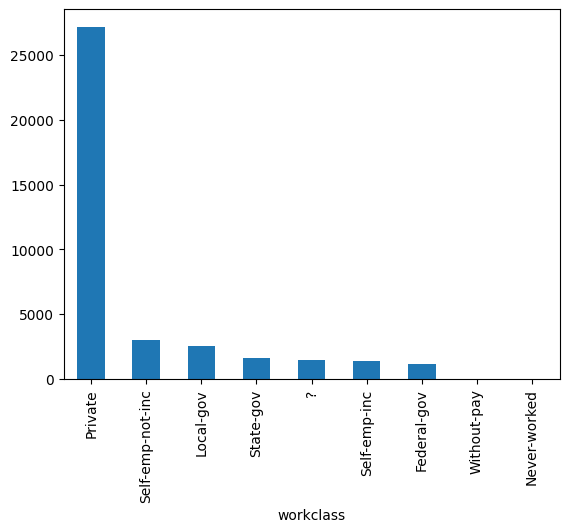

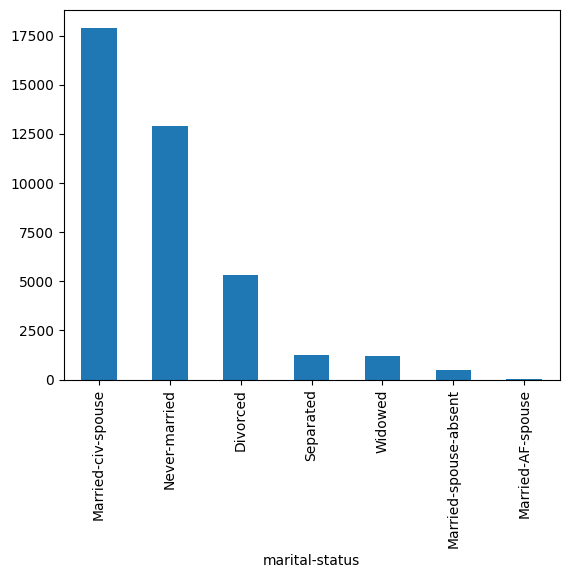

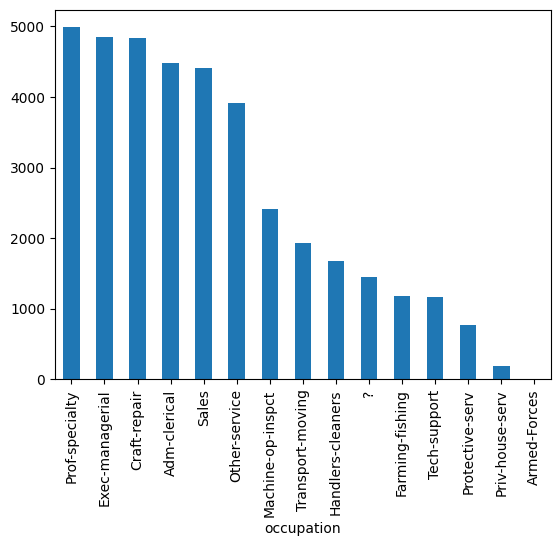

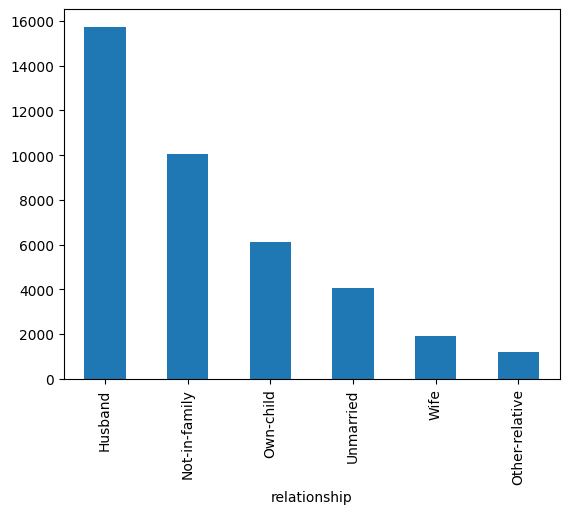

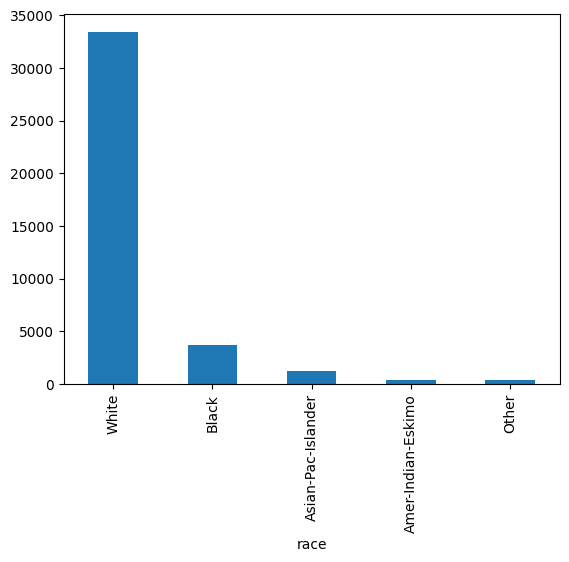

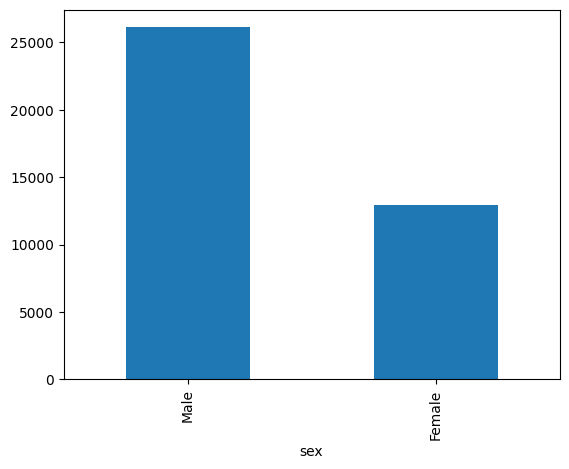

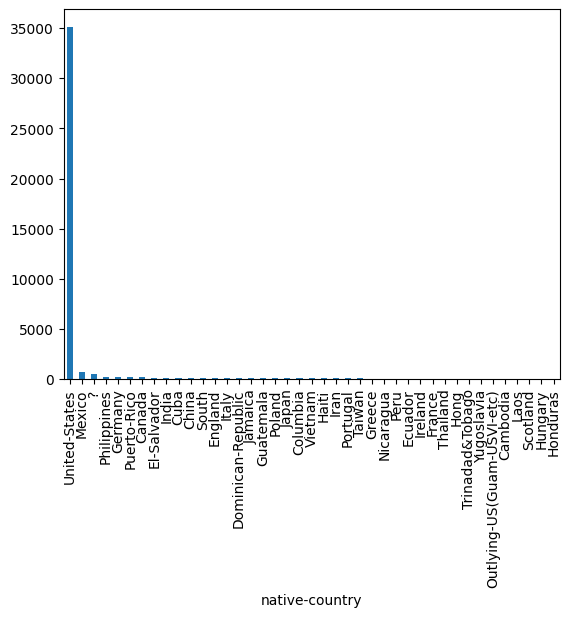

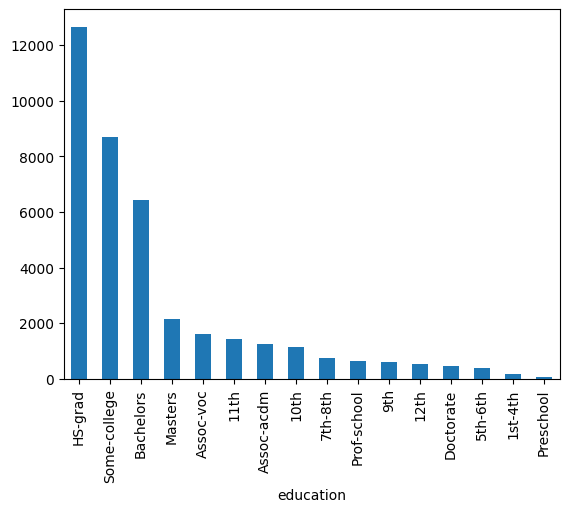

In [14]:
X_train["workclass"].value_counts().plot.bar()
plt.show()

X_train["marital-status"].value_counts().plot.bar()
plt.show()

X_train["occupation"].value_counts().plot.bar()
plt.show()

X_train["relationship"].value_counts().plot.bar()
plt.show()

X_train["race"].value_counts().plot.bar()
plt.show()

X_train["sex"].value_counts().plot.bar()
plt.show()

X_train["native-country"].value_counts().plot.bar()
plt.show()

X_train["education"].value_counts().plot.bar()
plt.show()


## Principais achados da análise univariada

Com base nos gráficos e estatísticas, observamos os seguintes pontos:

- **age**: maior concentração entre 30 e 50 anos.
- **education-num**: poucos outliers e concentração em torno de 10 a 12 anos.
- **capital-gain** e **capital-loss**: alta frequência de valores iguais a zero, o que pode reduzir seu poder preditivo isolado.
- **hours-per-week**: forte concentração em torno de 40 horas semanais.
- **workclass** e **occupation**: presença de categoria sem identificação explícita (`?`), indicando necessidade de tratamento.
- **race**: predominância da categoria *White*.
- **sex**: predominância do sexo masculino.
- **native-country**: maioria concentrada em *United-States*, com possíveis efeitos relevantes para categorias minoritárias.

## Análise bivariada

### Relações entre variáveis numéricas

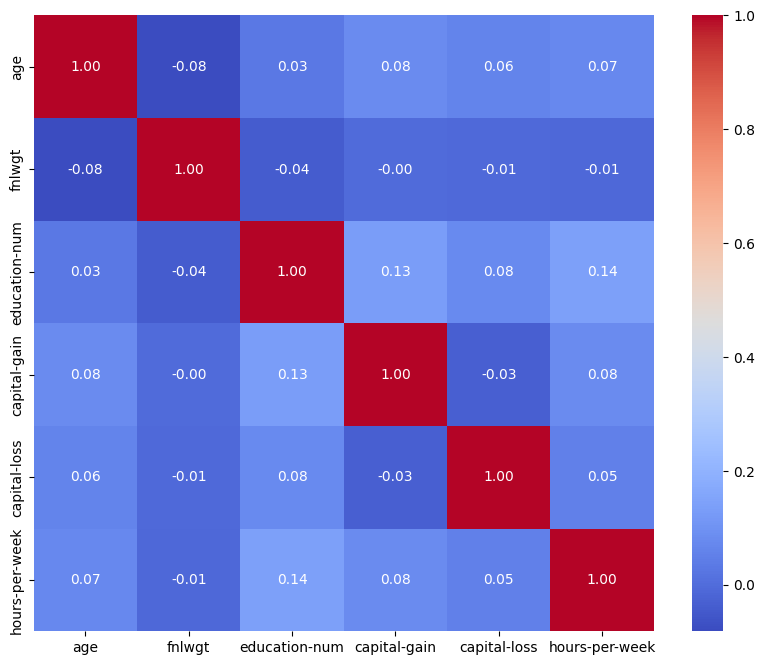

In [17]:
df_corr = X_train.select_dtypes(include=['number']).copy()

corr = df_corr.corr()

plt.figure(figsize=(10,8))

sns.heatmap(corr, 
            annot=True,
            cmap="coolwarm",
            fmt=".2f")
plt.show()

### Relações entre variáveis categóricas e o target

In [18]:
# variáveis categóricas automaticamente (tudo que NÃO é number)
cat_cols = X_train.select_dtypes(exclude=["number"]).columns.tolist()
cat_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

In [19]:
# dataframe auxiliar para cruzar categóricas com o target
df_cat_target = X_train[cat_cols].copy()
df_cat_target["income"] = y_train.values

In [23]:
# tabelas de contingência (contagem e proporção por linha)
for col in cat_cols:
    print(f"\n{'='*70}\nVariável: {col}\n{'='*70}")
    
    tabela_contagem = pd.crosstab(df_cat_target[col], df_cat_target["income"])
    tabela_prop = pd.crosstab(
        df_cat_target[col],
        df_cat_target["income"],
        normalize="index"
    ).round(3)

    print("Tabela de contingência (contagem):")
    display(tabela_contagem)

    print("Tabela de contingência (proporção por categoria):")
    display(tabela_prop)


Variável: workclass
Tabela de contingência (contagem):


income,<=50K,>50K
workclass,,
?,1302,148
Federal-gov,686,446
Local-gov,1774,735
Never-worked,9,0
Private,21256,5921
Self-emp-inc,608,770
Self-emp-not-inc,2215,819
State-gov,1166,429
Without-pay,15,2


Tabela de contingência (proporção por categoria):


income,<=50K,>50K
workclass,,
?,0.898,0.102
Federal-gov,0.606,0.394
Local-gov,0.707,0.293
Never-worked,1.000,0.000
Private,0.782,0.218
Self-emp-inc,0.441,0.559
Self-emp-not-inc,0.730,0.270
State-gov,0.731,0.269
Without-pay,0.882,0.118



Variável: education
Tabela de contingência (contagem):


income,<=50K,>50K
education,,
10th,1084,72
11th,1366,74
12th,489,38
1st-4th,182,7
5th-6th,383,23
7th-8th,686,53
9th,575,34
Assoc-acdm,930,339
Assoc-voc,1216,412


Tabela de contingência (proporção por categoria):


income,<=50K,>50K
education,,
10th,0.938,0.062
11th,0.949,0.051
12th,0.928,0.072
1st-4th,0.963,0.037
5th-6th,0.943,0.057
7th-8th,0.928,0.072
9th,0.944,0.056
Assoc-acdm,0.733,0.267
Assoc-voc,0.747,0.253



Variável: marital-status
Tabela de contingência (contagem):


income,<=50K,>50K
marital-status,,
Divorced,4775,522
Married-AF-spouse,16,13
Married-civ-spouse,9892,8017
Married-spouse-absent,445,42
Never-married,12344,570
Separated,1179,70
Widowed,1090,98


Tabela de contingência (proporção por categoria):


income,<=50K,>50K
marital-status,,
Divorced,0.901,0.099
Married-AF-spouse,0.552,0.448
Married-civ-spouse,0.552,0.448
Married-spouse-absent,0.914,0.086
Never-married,0.956,0.044
Separated,0.944,0.056
Widowed,0.918,0.082



Variável: occupation
Tabela de contingência (contagem):


income,<=50K,>50K
occupation,,
?,1309,148
Adm-clerical,3883,598
Armed-Forces,9,3
Craft-repair,3742,1091
Exec-managerial,2531,2322
Farming-fishing,1046,135
Handlers-cleaners,1568,115
Machine-op-inspct,2121,296
Other-service,3749,167


Tabela de contingência (proporção por categoria):


income,<=50K,>50K
occupation,,
?,0.898,0.102
Adm-clerical,0.867,0.133
Armed-Forces,0.750,0.250
Craft-repair,0.774,0.226
Exec-managerial,0.522,0.478
Farming-fishing,0.886,0.114
Handlers-cleaners,0.932,0.068
Machine-op-inspct,0.878,0.122
Other-service,0.957,0.043



Variável: relationship
Tabela de contingência (contagem):


income,<=50K,>50K
relationship,,
Husband,8658,7090
Not-in-family,9086,981
Other-relative,1139,41
Own-child,6031,91
Unmarried,3820,239
Wife,1007,890


Tabela de contingência (proporção por categoria):


income,<=50K,>50K
relationship,,
Husband,0.550,0.450
Not-in-family,0.903,0.097
Other-relative,0.965,0.035
Own-child,0.985,0.015
Unmarried,0.941,0.059
Wife,0.531,0.469



Variável: race
Tabela de contingência (contagem):


income,<=50K,>50K
race,,
Amer-Indian-Eskimo,327,47
Asian-Pac-Islander,878,323
Black,3289,445
Other,297,42
White,24950,8475


Tabela de contingência (proporção por categoria):


income,<=50K,>50K
race,,
Amer-Indian-Eskimo,0.874,0.126
Asian-Pac-Islander,0.731,0.269
Black,0.881,0.119
Other,0.876,0.124
White,0.746,0.254



Variável: sex
Tabela de contingência (contagem):


income,<=50K,>50K
sex,,
Female,11555,1404
Male,18186,7928


Tabela de contingência (proporção por categoria):


income,<=50K,>50K
sex,,
Female,0.892,0.108
Male,0.696,0.304



Variável: native-country
Tabela de contingência (contagem):


income,<=50K,>50K
native-country,,
?,344,121
Cambodia,14,5
Canada,105,46
China,68,28
Columbia,63,1
Cuba,86,24
Dominican-Republic,78,4
Ecuador,32,5
El-Salvador,109,10


Tabela de contingência (proporção por categoria):


income,<=50K,>50K
native-country,,
?,0.740,0.260
Cambodia,0.737,0.263
Canada,0.695,0.305
China,0.708,0.292
Columbia,0.984,0.016
Cuba,0.782,0.218
Dominican-Republic,0.951,0.049
Ecuador,0.865,0.135
El-Salvador,0.916,0.084


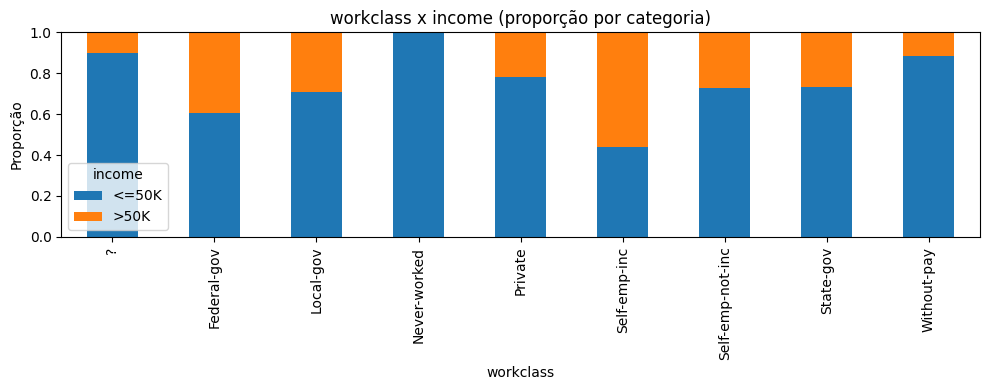

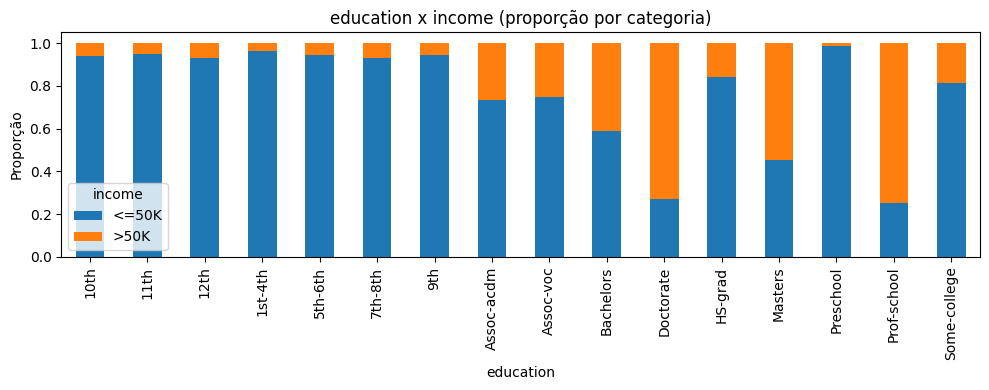

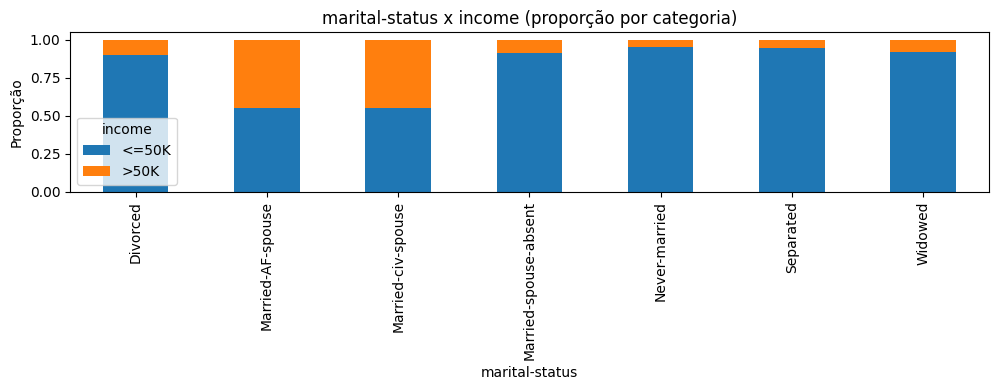

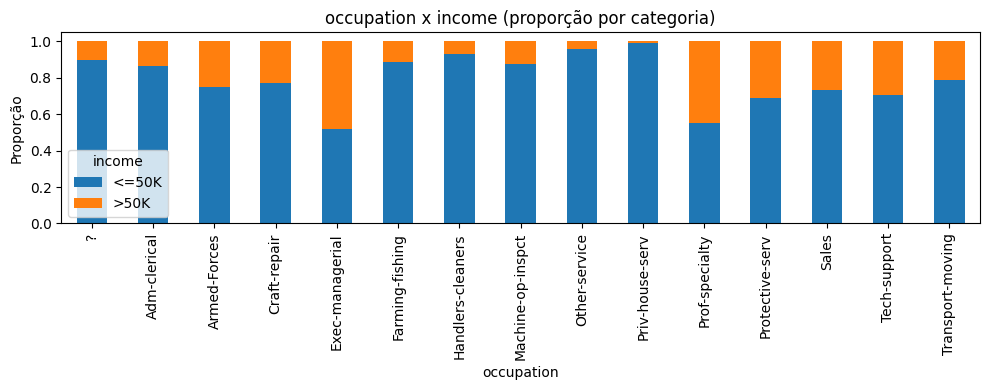

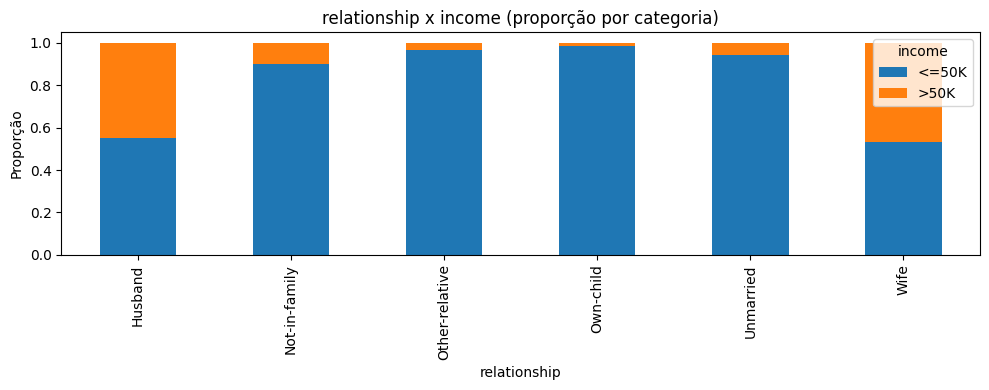

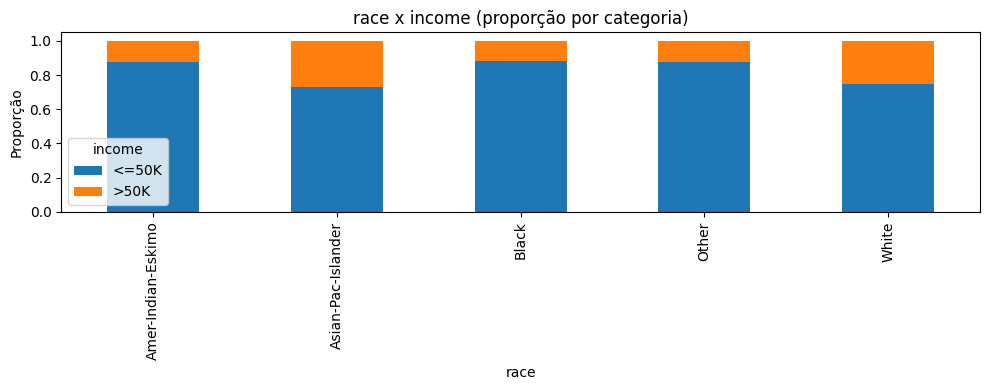

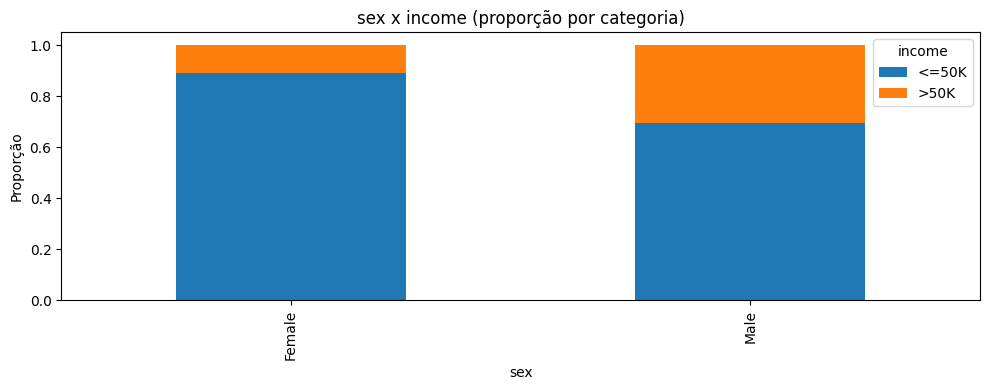

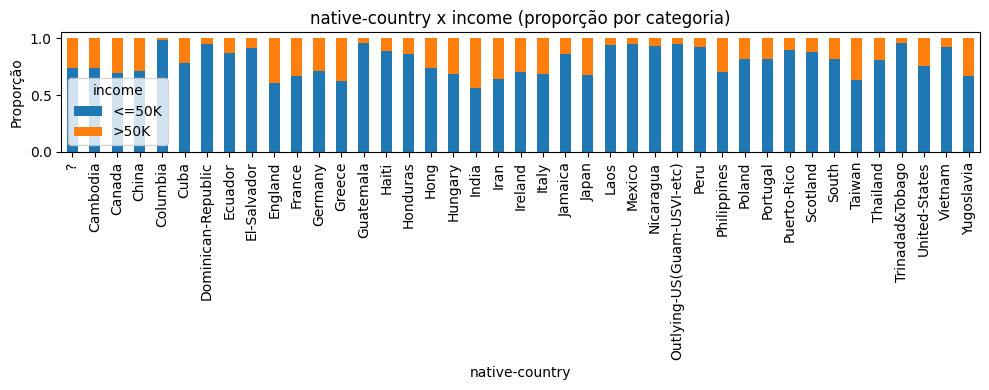

In [21]:
# gráficos de barras (proporção de income dentro de cada categoria)
for col in cat_cols:
    tabela_prop = pd.crosstab(
        df_cat_target[col],
        df_cat_target["income"],
        normalize="index"
    )

    tabela_prop.plot(kind="bar", stacked=True, figsize=(10, 4))
    plt.title(f"{col} x income (proporção por categoria)")
    plt.xlabel(col)
    plt.ylabel("Proporção")
    plt.legend(title="income")
    plt.tight_layout()
    plt.show()

Analise entre variáveis numéricas e categóricas usando boxplots ou violin plots.

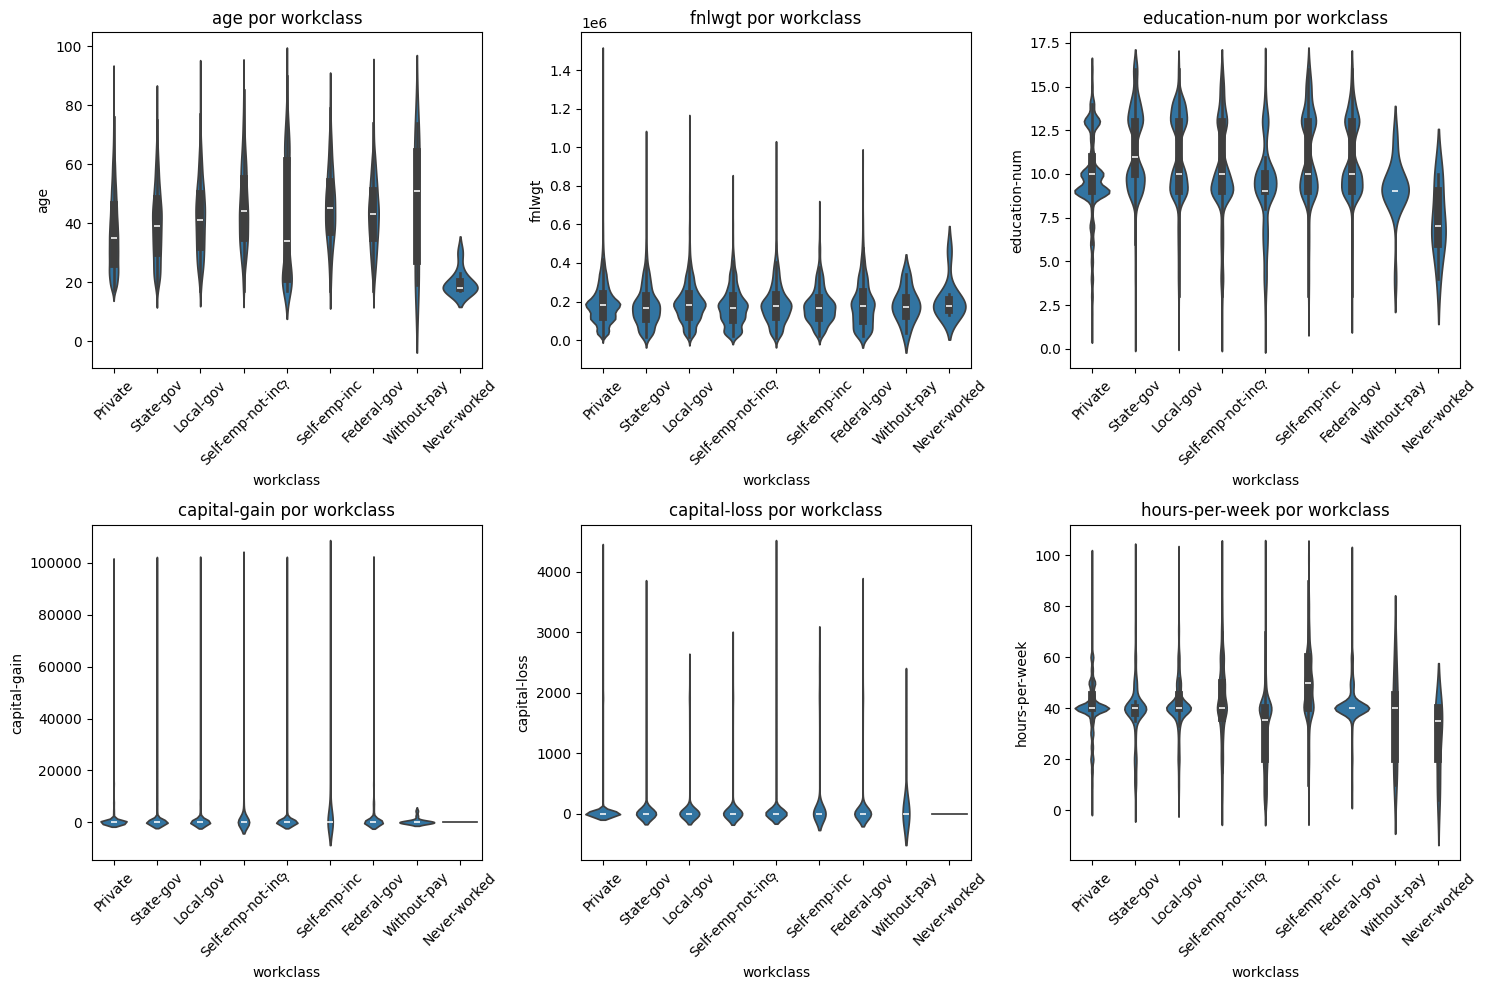

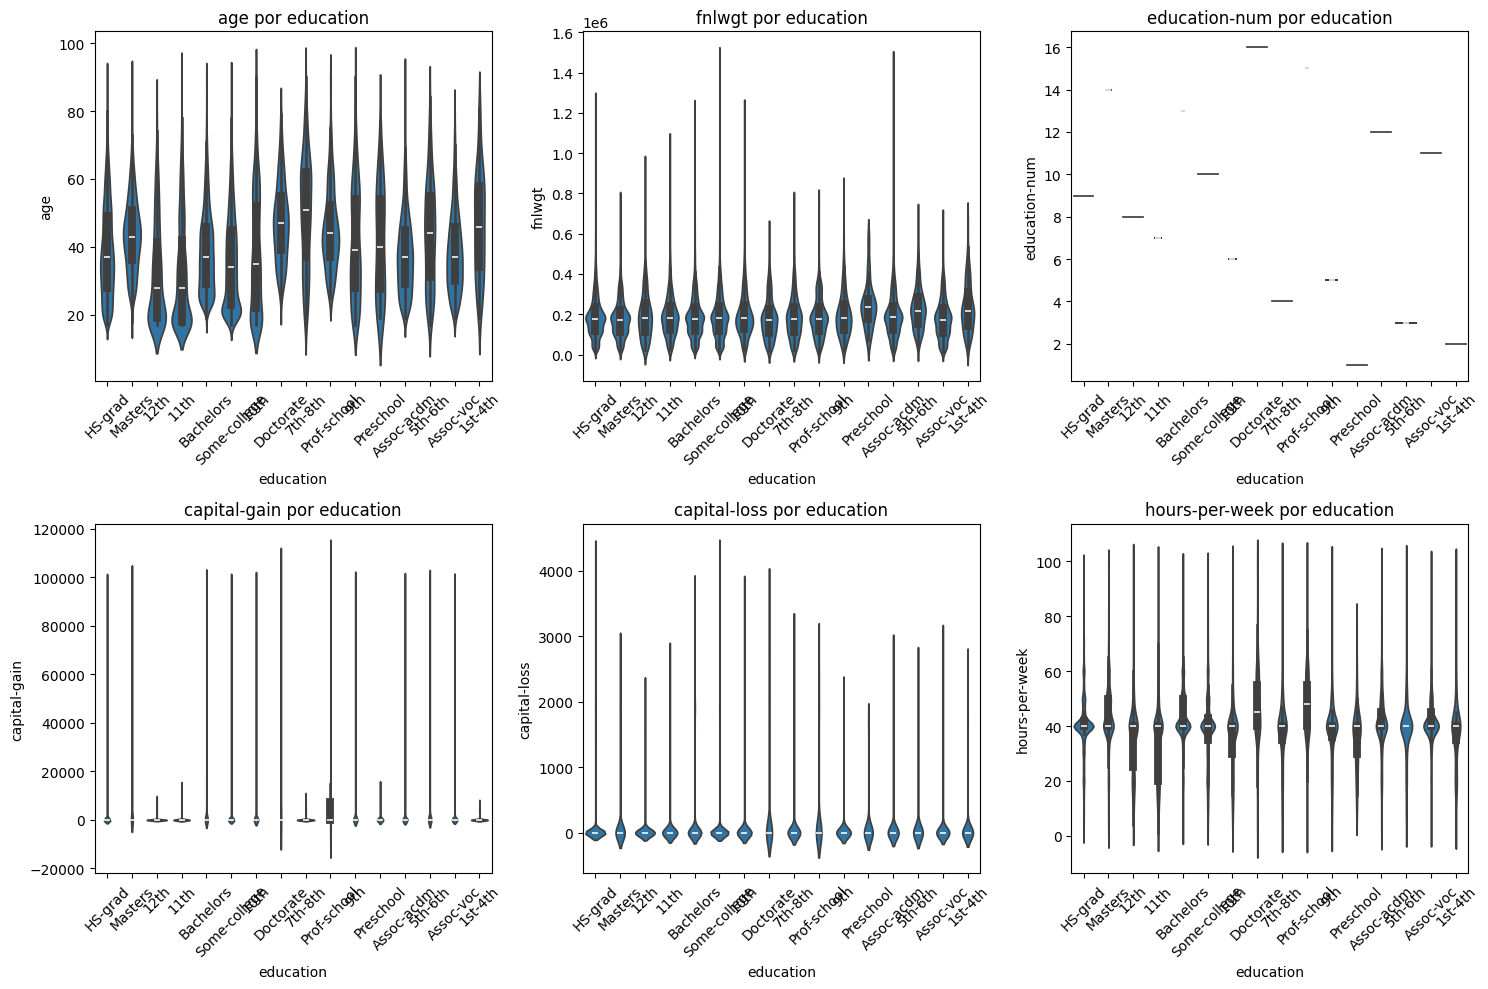

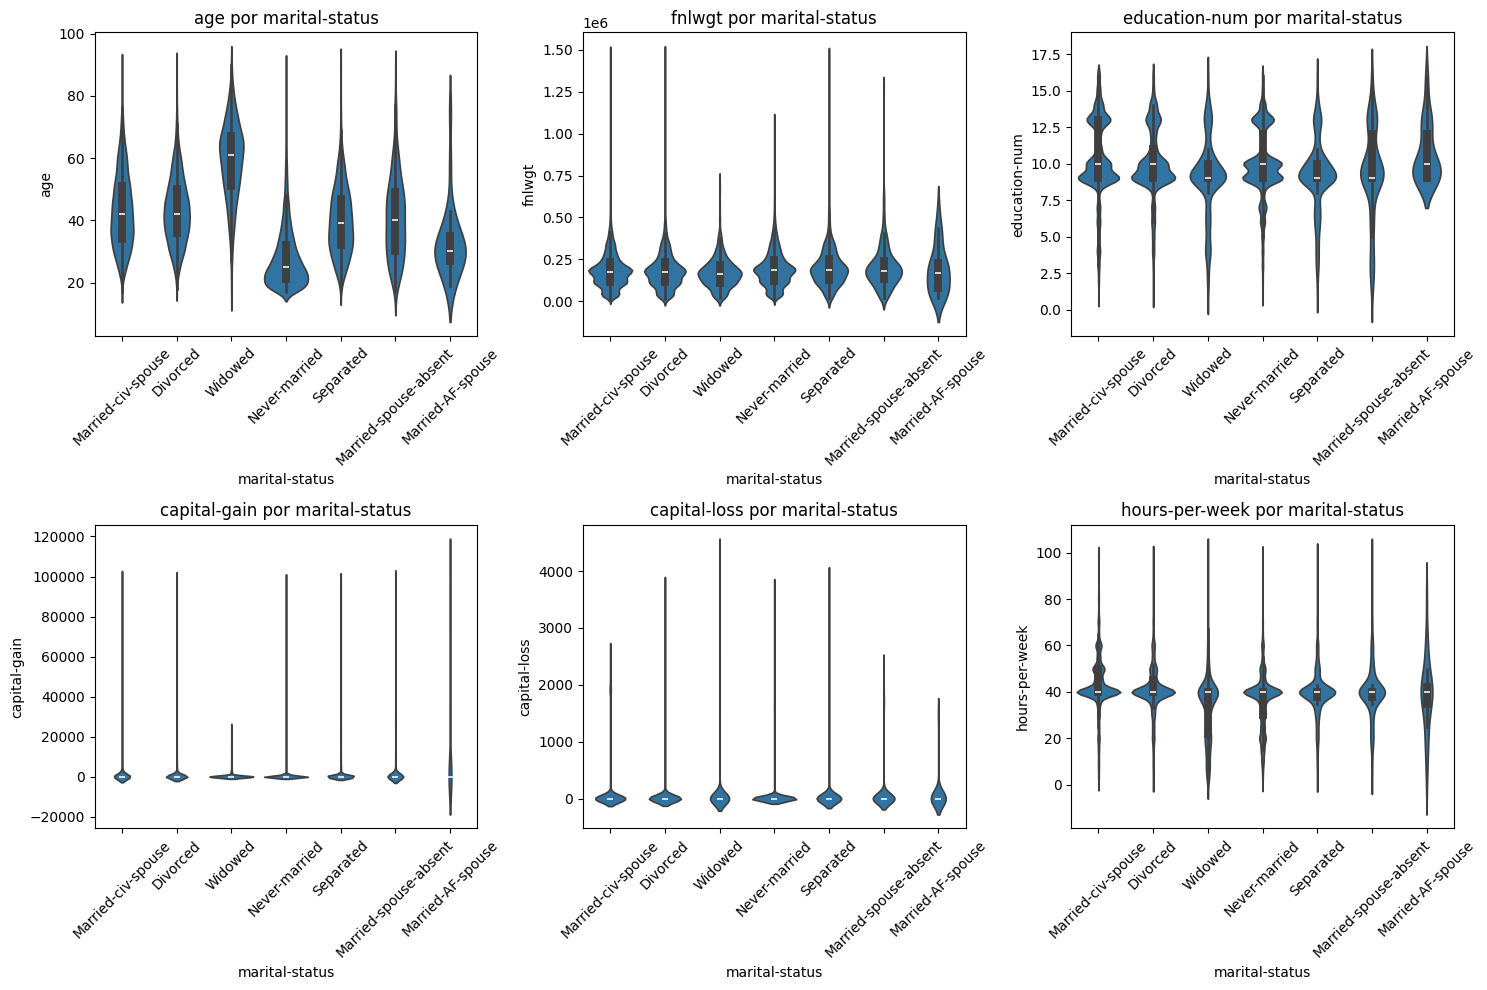

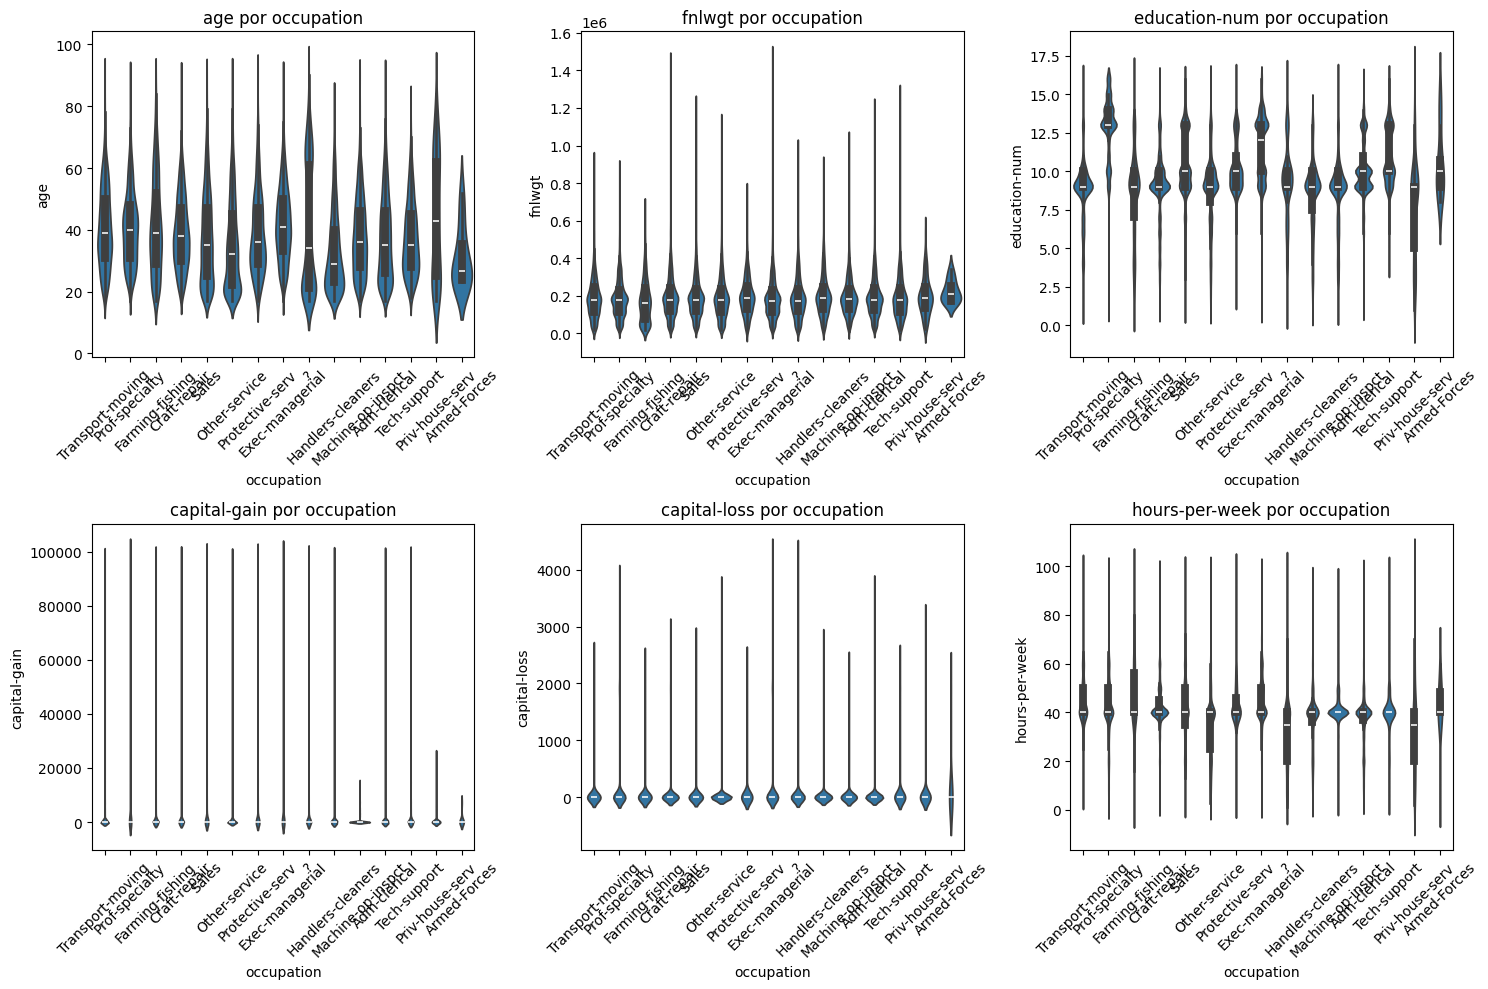

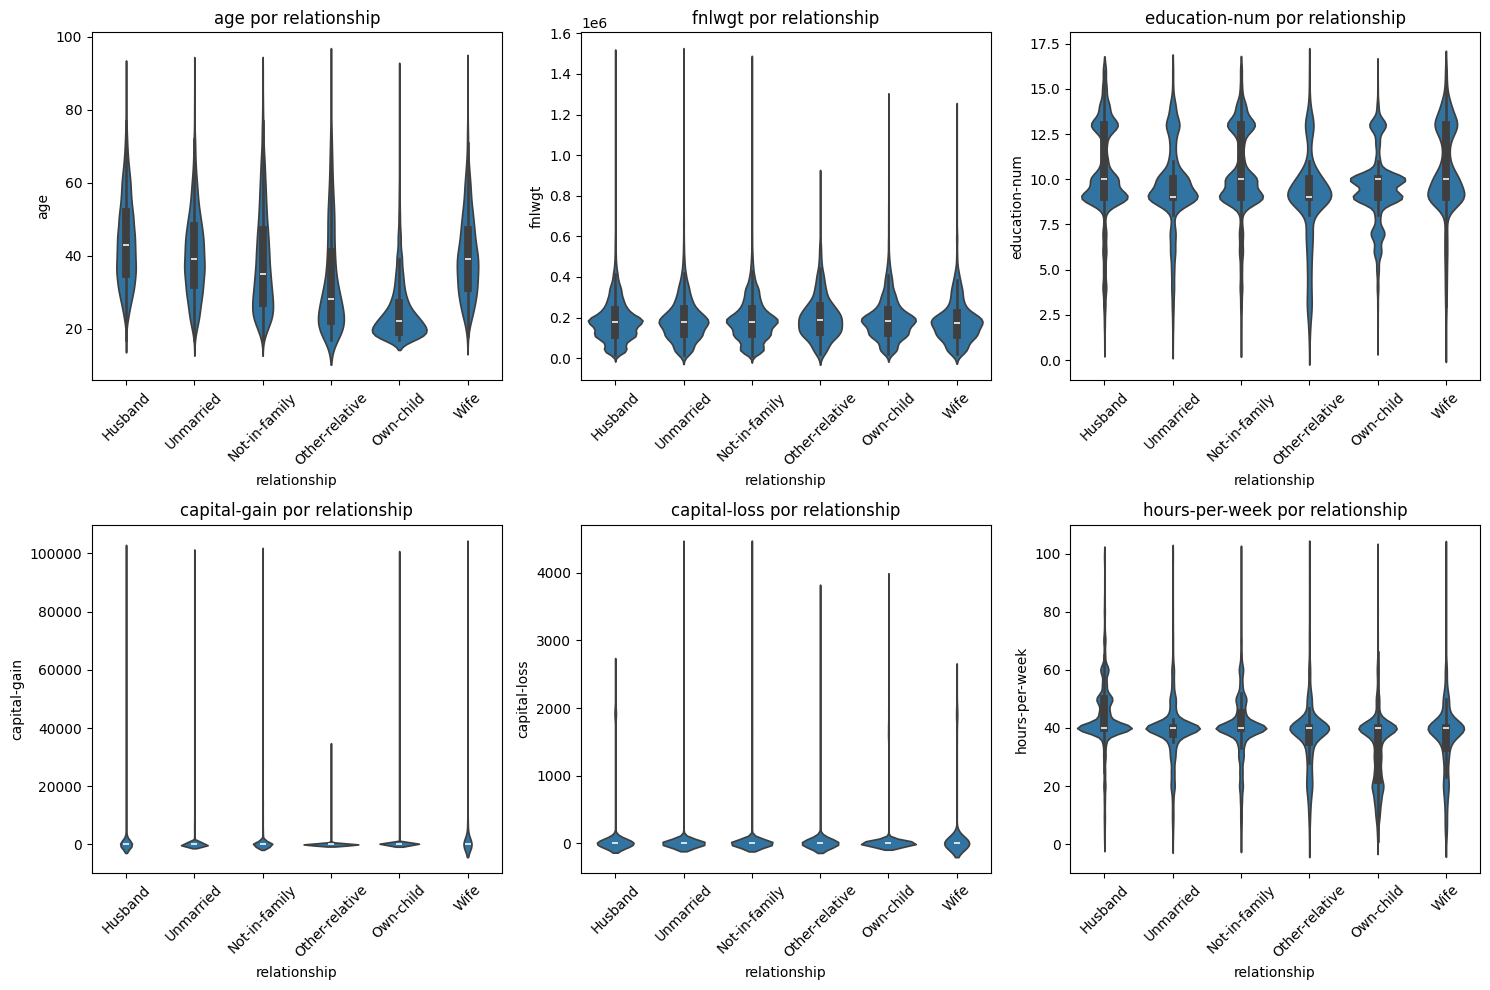

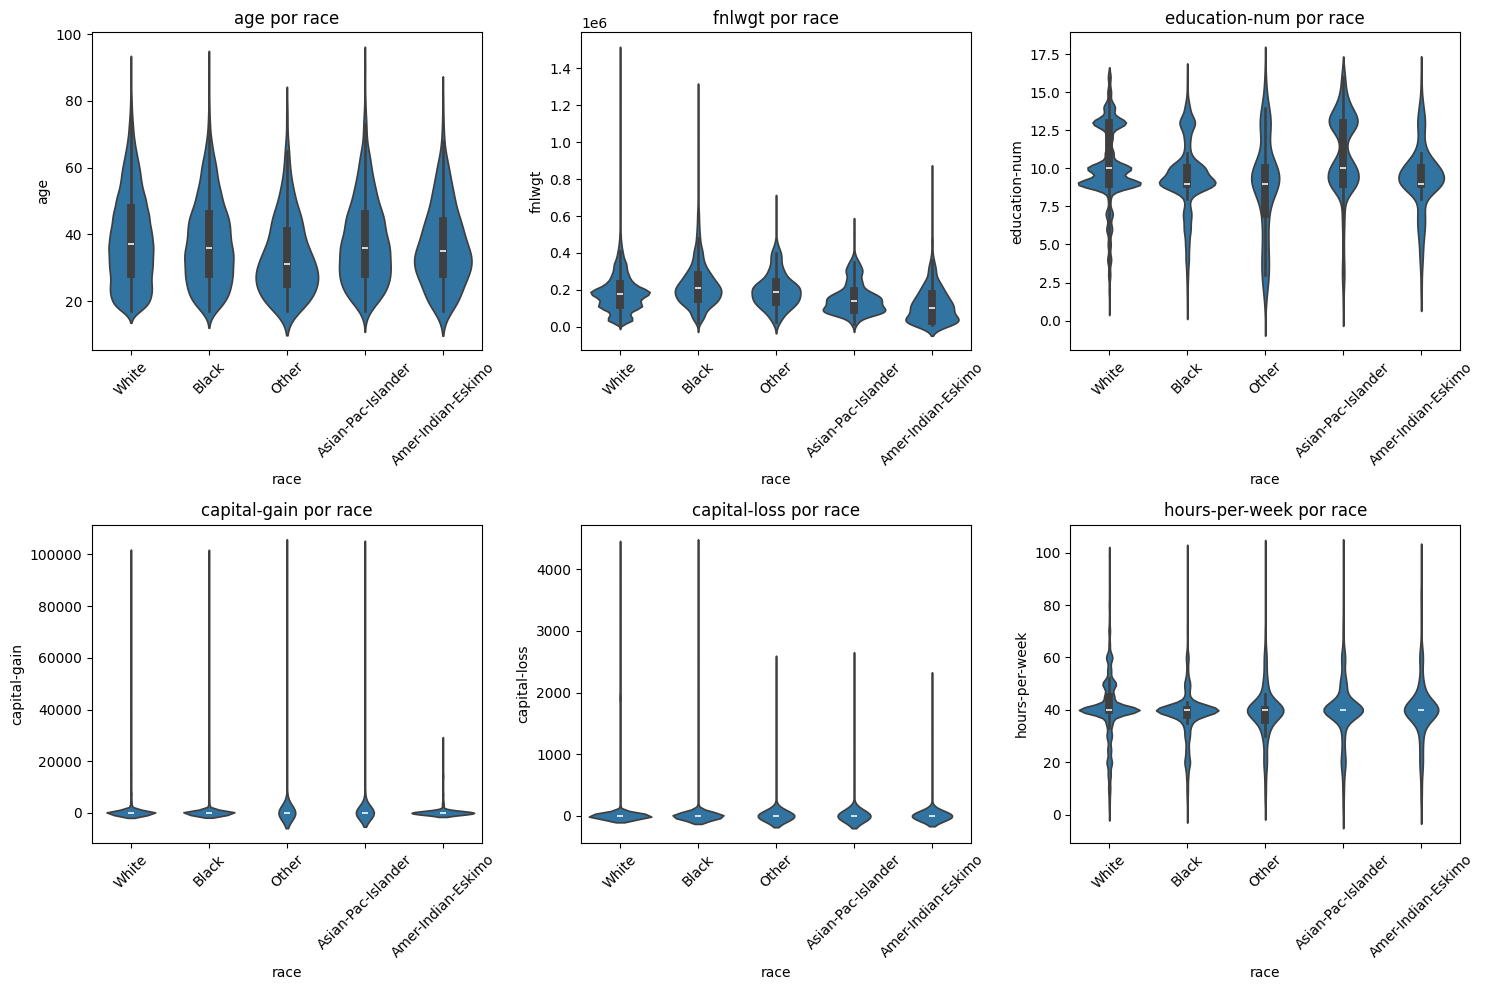

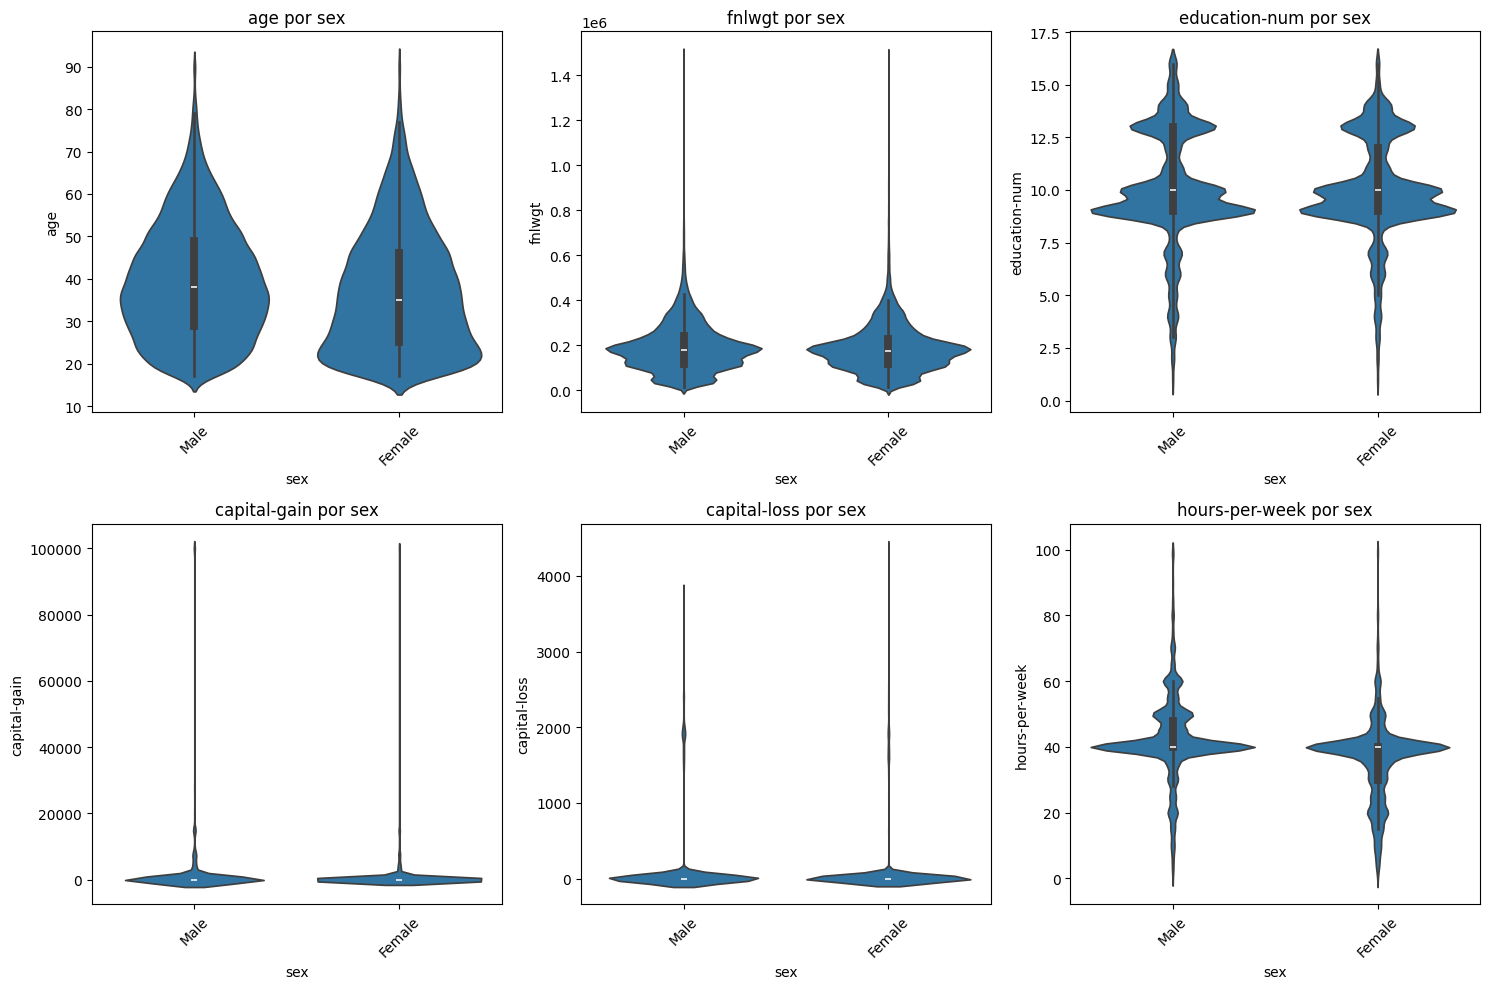

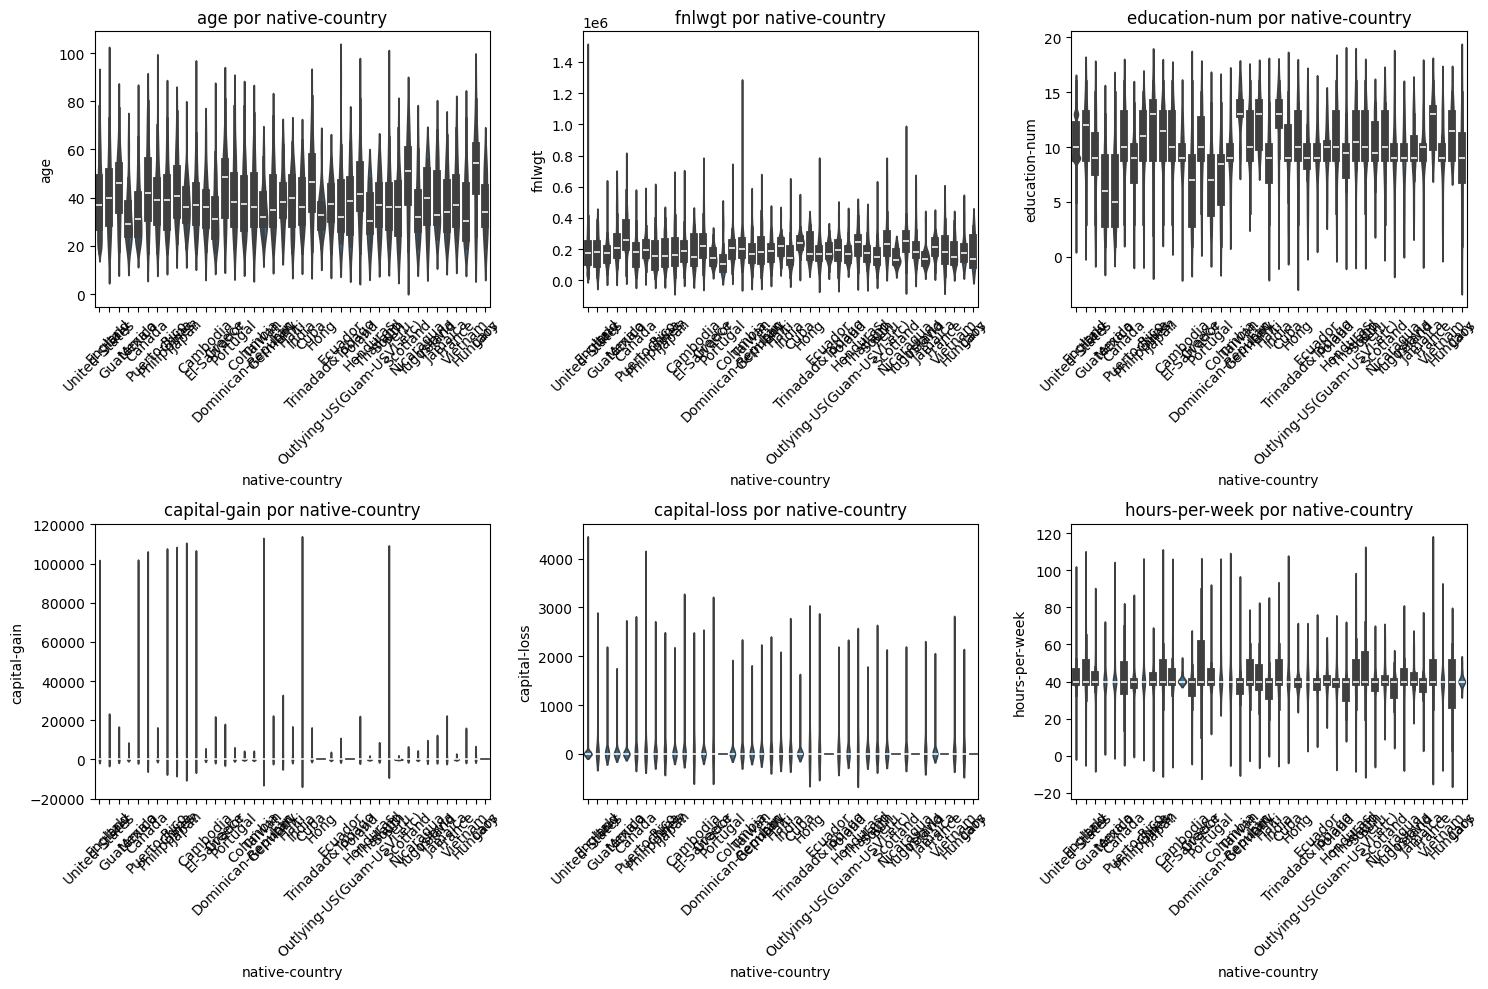

In [24]:
# Violin plots: variáveis numéricas por cada categoria
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()

for cat_col in cat_cols:
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, num_col in enumerate(num_cols):
        sns.violinplot(x=cat_col, y=num_col, data=X_train, ax=axes[idx])
        axes[idx].set_title(f"{num_col} por {cat_col}")
        axes[idx].tick_params(axis='x', rotation=45)
    
    # Ocultar subplots não utilizados
    for idx in range(len(num_cols), len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

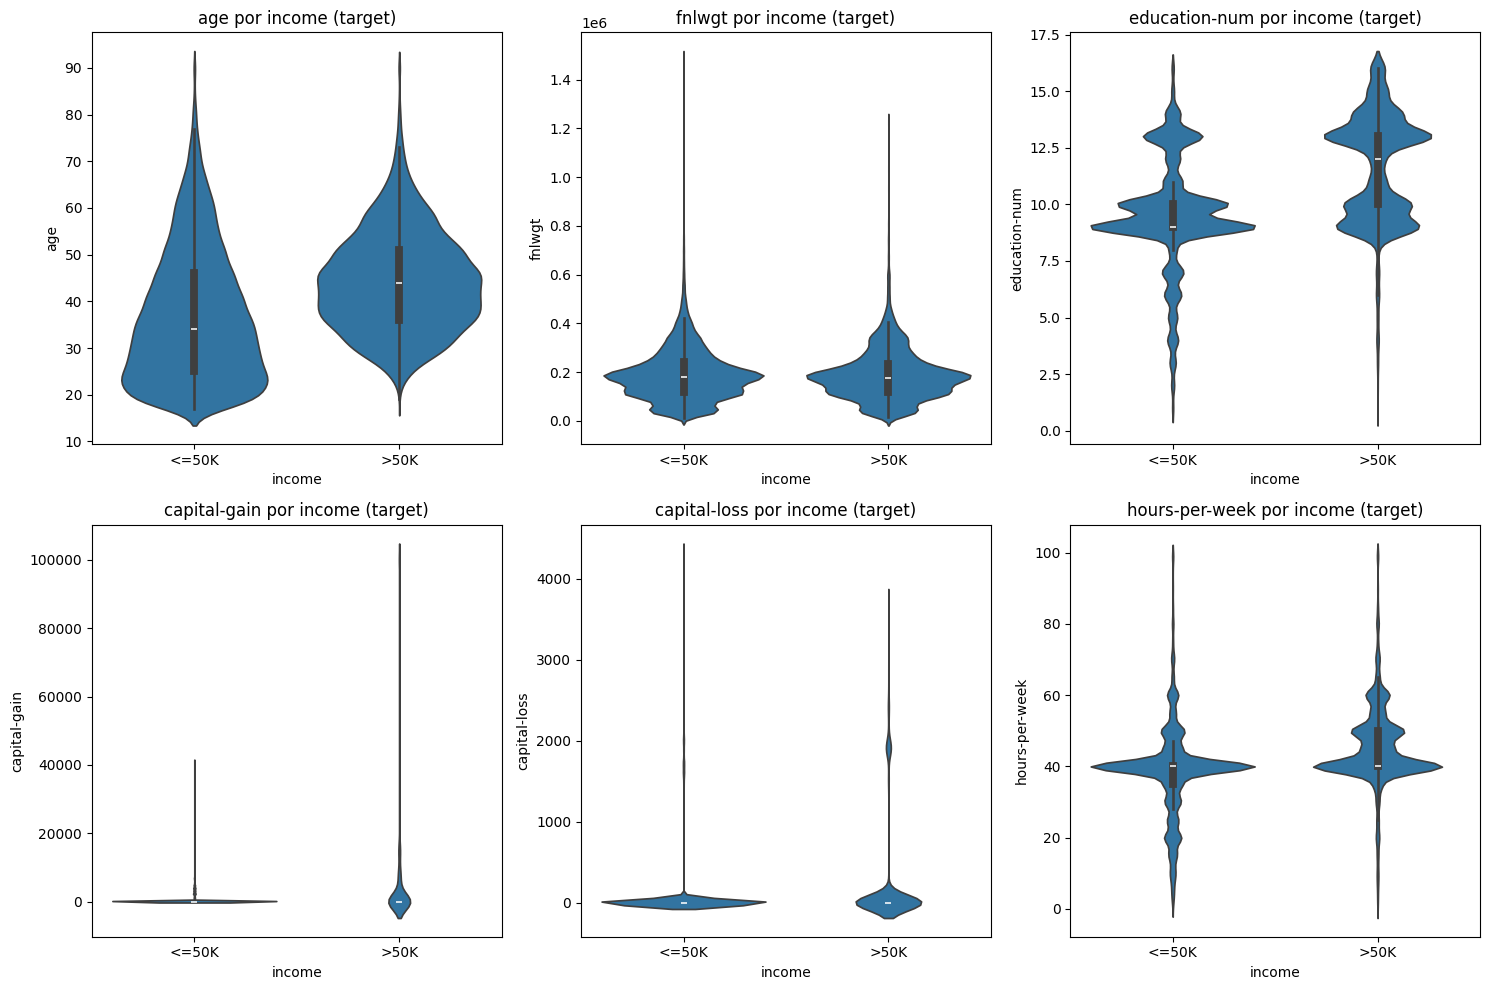

In [25]:
# Violin plots: variáveis numéricas estratificadas pelo target
df_train_with_target = X_train.copy()
df_train_with_target["income"] = y_train.values

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, num_col in enumerate(num_cols):
    sns.violinplot(x="income", y=num_col, data=df_train_with_target, ax=axes[idx])
    axes[idx].set_title(f"{num_col} por income (target)")
    axes[idx].set_xlabel("income")

# Ocultar subplots não utilizados
for idx in range(len(num_cols), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()